In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 1. Load datas

In [2]:
file_path = "../Database/Ravi_Cancer_Cell_2022/scTumor_Tissue/#"
folders = ['UKF313', 'UKF315', 'UKF334', 'UKF357', 'UKF410']
adata_list = []
for folder in folders:
    adata = sc.read_10x_h5(file_path + folder + "_T_SCRNA/outs/filtered_feature_bc_matrix.h5")
    adata.obs['sample'] = folder
    adata.obs_names_make_unique()
    adata.var_names_make_unique()
    adata_list.append(adata)

/home/jsw/jswenv/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/jsw/jswenv/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/jsw/jswenv/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/jsw/jswenv/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/jsw/jswenv/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_m

# 2. Filtering

In [3]:
for adata in adata_list:
    sc.pp.filter_cells(adata, min_genes = 30)

In [4]:
# Ribosomal genes for human
ribo_url = 'http://software.broadinstitute.org/gsea/msigdb/download_geneset.jsp?geneSetName=KEGG_RIBOSOME&fileType=txt'
ribo_genes = pd.read_table(ribo_url, skiprows = 2, header = None)

del ribo_url

In [5]:
# Calculate QC metrics
for adata in adata_list:
    adata.var['mito'] = adata.var_names.str.startswith('MT-')   # 'mt-' for mouse, 'MT-' for human  # mitochondrial genes boolean
    adata.var['ribo'] = adata.var_names.isin(ribo_genes[0].values)  # ribosomal genes boolean
    
    sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True, qc_vars=['mito', 'ribo'])    # calculate qc metrics

    # remove useless vars
    adata.obs.drop(columns=['total_counts_mito', 'total_counts_ribo'], inplace=True)
    adata.var.drop(columns=['mito', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'], inplace=True)

adata_list
del ribo_genes

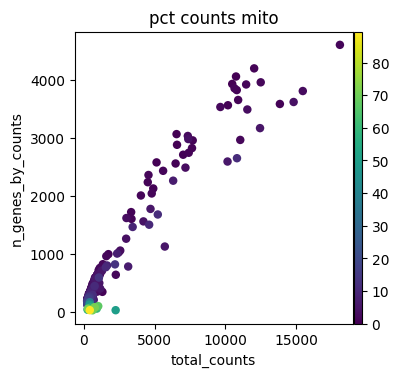

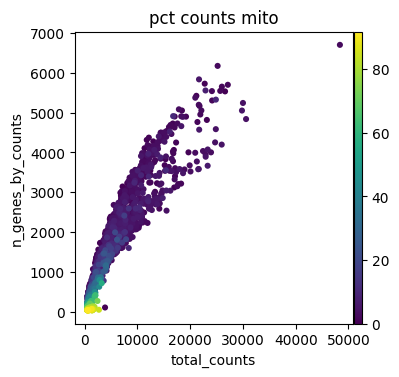

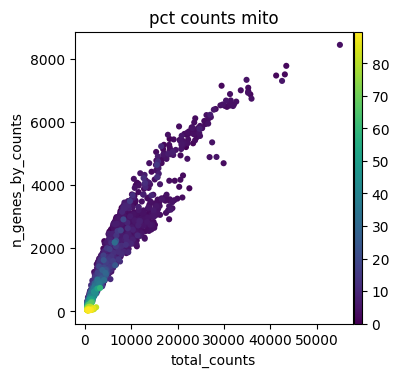

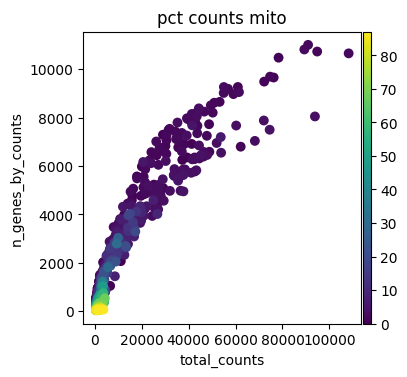

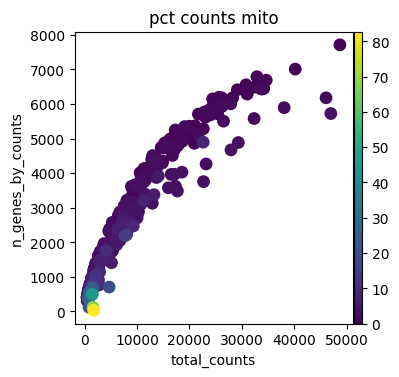

In [6]:
# Scatter plot of the cell quality
rcParams['figure.figsize'] = 4, 4 # width, height

for adata in adata_list:
    sc.pl.scatter(
        adata,
        x = 'total_counts',
        y = 'n_genes_by_counts',
        color = 'pct_counts_mito',
    )

In [7]:
# Filter the data
for i in range(len(adata_list)):
    cutoff_top = np.quantile(adata_list[i].obs.n_genes_by_counts.values, .95)
    adata_list[i] = adata_list[i][adata_list[i].obs.n_genes_by_counts < cutoff_top]
    
    cutoff_top = np.quantile(adata_list[i].obs.total_counts.values, .95)
    adata_list[i] = adata_list[i][adata_list[i].obs.total_counts < cutoff_top]
    
    cutoff_top = np.quantile(adata_list[i].obs.pct_counts_mito.values, .90)
    adata_list[i] = adata_list[i][adata_list[i].obs.pct_counts_mito < cutoff_top]

adata_list
del cutoff_top, i

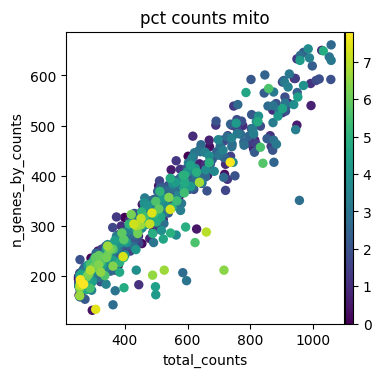

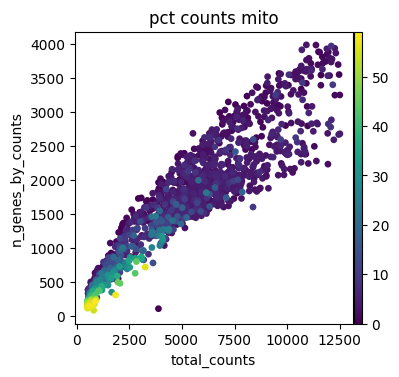

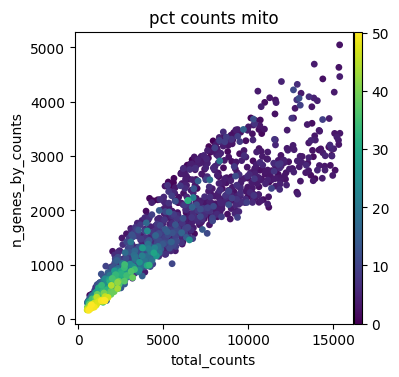

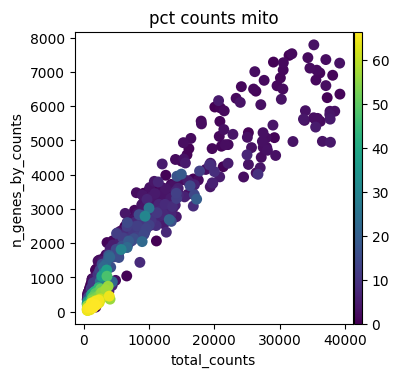

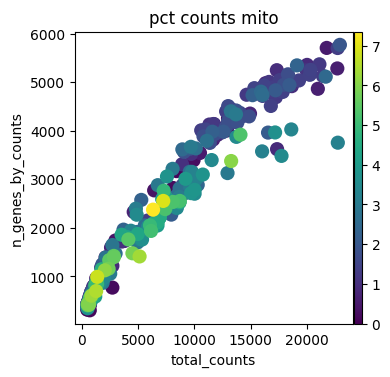

In [8]:
# Scatter plot of the cell quality
rcParams['figure.figsize'] = 4, 4 # width, height

for adata in adata_list:
    sc.pl.scatter(
        adata,
        x = 'total_counts',
        y = 'n_genes_by_counts',
        color = 'pct_counts_mito',
    )

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.47
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.9%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 0.0%
Elapsed time: 0.2 seconds
Processed adata 1/5 successfully.
Preprocessing...
Simulating doublets...


/tmp/ipykernel_63019/3684440307.py:9: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['doublet_scores'] = doublet_scores


Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.39
Detected doublet rate = 0.9%
Estimated detectable doublet fraction = 37.1%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 2.6%
Elapsed time: 0.4 seconds
Processed adata 2/5 successfully.
Preprocessing...
Simulating doublets...


/tmp/ipykernel_63019/3684440307.py:9: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['doublet_scores'] = doublet_scores


Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.53
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 20.6%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 1.2%
Elapsed time: 0.4 seconds
Processed adata 3/5 successfully.
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...


/tmp/ipykernel_63019/3684440307.py:9: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['doublet_scores'] = doublet_scores


Calculating doublet scores...
Automatically set threshold at doublet score = 0.42
Detected doublet rate = 0.6%
Estimated detectable doublet fraction = 11.7%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 5.3%
Elapsed time: 0.3 seconds
Processed adata 4/5 successfully.
Preprocessing...
Simulating doublets...


/tmp/ipykernel_63019/3684440307.py:9: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['doublet_scores'] = doublet_scores


Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.34
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 17.2%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 2.0%
Elapsed time: 0.2 seconds
Processed adata 5/5 successfully.


/tmp/ipykernel_63019/3684440307.py:9: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['doublet_scores'] = doublet_scores


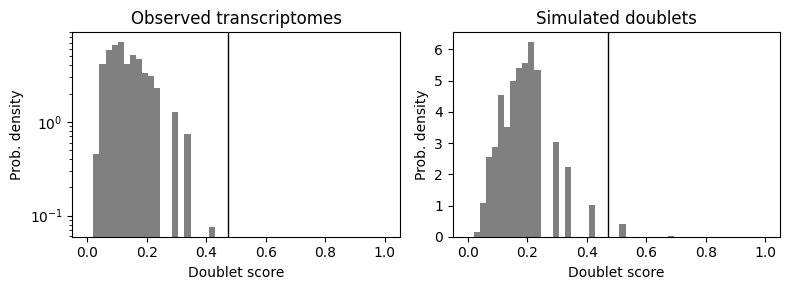

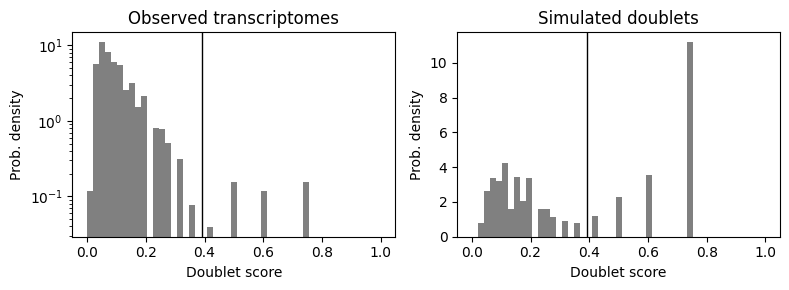

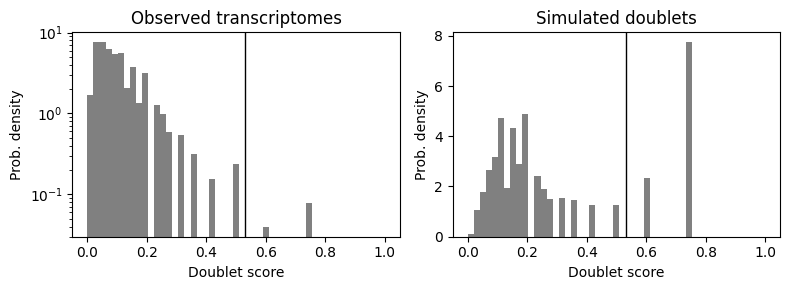

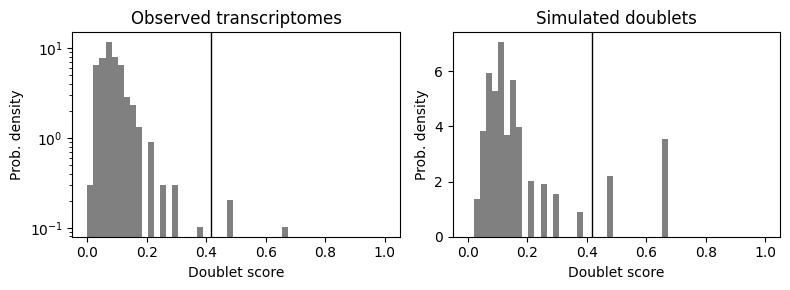

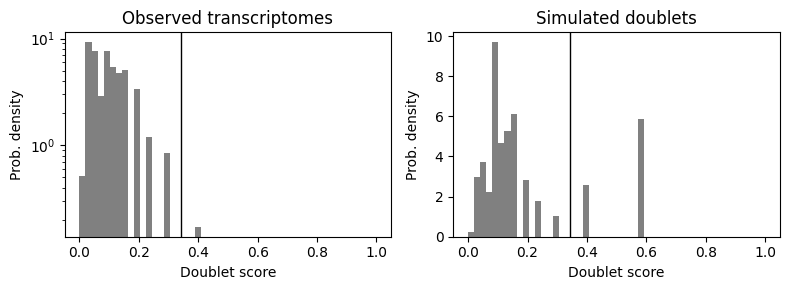

In [9]:
import scrublet as scr
for i, adata in enumerate(adata_list):
    try:
        # Scrublet 객체 생성
        scrub = scr.Scrublet(adata.X)
        
        doublet_scores, predicted_doublets = scrub.scrub_doublets()
        
        adata.obs['doublet_scores'] = doublet_scores
        adata.obs['predicted_doublets'] = predicted_doublets
        
        print(f"Processed adata {i + 1}/{len(adata_list)} successfully.")
        scrub.plot_histogram()
    except Exception as e:
        print(f"Error in processing adata {i + 1}/{len(adata_list)}: {e}")
        # adata.obs의 doublet_scores와 predicted_doublets에 모두 NA를 설정
        adata.obs['doublet_scores'] = pd.Series([np.nan] * adata.shape[0])
        adata.obs['predicted_doublets'] = pd.Series([np.nan] * adata.shape[0])
        continue

del scrub, doublet_scores, predicted_doublets

In [10]:
adata = sc.concat(adata_list, join='outer')
adata.obs.drop(columns=['n_genes_by_counts', 'predicted_doublets', 'doublet_scores'], inplace=True)

adata.obs_names_make_unique()

/home/jsw/jswenv/lib/python3.10/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [14]:
adata.obs

,sample,n_genes,total_counts,pct_counts_mito,pct_counts_ribo
AAACGAAAGAAGCGGG-1,UKF313,225,305.0,0.983607,15.737705
AAACGAAGTTGTCAGT-1,UKF313,467,779.0,2.567394,6.546855
AAAGAACGTACCTTCC-1,UKF313,316,479.0,3.131524,0.835073
AAAGGGCAGGAACGCT-1,UKF313,232,308.0,4.870130,1.948052
AAAGGGCCAGATTCGT-1,UKF313,212,437.0,3.890160,32.494278
...,...,...,...,...,...
TTTAGTCTCAGTCACA-1,UKF410,2811,8684.0,2.671580,19.725933
TTTCACACAGCGTATT-1,UKF410,1225,2449.0,0.530829,8.860760
TTTCACAGTTGCCTAA-1,UKF410,604,806.0,1.861042,5.583127
TTTCAGTAGTGAGCCA-1,UKF410,781,1019.0,1.177625,3.434740
